In [1]:
import sys

In [2]:
cd '/srv/flash1/hagrawal9/project/habitat/habitat-api/'

/coc/testnvme/hagrawal9/project/habitat/habitat-api


In [3]:
import io
import base64
import imageio
import gzip
import json
import json_tricks
import os
import sys
from typing import Any, Dict, List, Optional, Type

import attr
import cv2
import git
import magnum as mn
import numpy as np

# %matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image


import habitat
import habitat_sim

from rearrangement.task.sensors import *

from habitat.config import Config
from habitat.core.registry import registry
from habitat_sim.utils import viz_utils as vut
from habitat.utils.visualizations import maps
from habitat.utils.visualizations.utils import observations_to_image

from habitat_sim.physics import MotionType
from habitat_sim.utils.viz_utils import is_notebook, display_video, get_fast_video_writer

In [4]:
from habitat.datasets.rearrangement.rearrangement_dataset import RearrangementDatasetV0
from habitat.tasks.rearrangement.rearrangement_task import RearrangementEpisode

In [6]:
p = 'data/maps/'
# data/new_checkpoints/b9KSrZfBpB5WC5gcCUtmMX/videos/map_object/dPKBtXvPV6S2RyA8HVckGZ
files = os.listdir(p)
j = 0

In [38]:
for i, file in enumerate(files[j:]):
    tdmap = np.load('data/maps/'+file)
    print(i)
    if 'Spencerville' in file:
        break

0
1


In [39]:
print(i, file)

1 0_Spencerville.glb_270.npy


In [40]:
eid = file.split('_')[0]
scene_id = file.split('_')[1]

In [41]:
eid, scene_id

('0', 'Spencerville.glb')

In [42]:
config = habitat.get_config("configs/tasks/rearrangement_gibson_map.yaml")

In [43]:
scene_id

'Spencerville.glb'

In [44]:
config.defrost()
config.DATASET.SPLIT = "test"
config.DATASET.CONTENT_SCENES = [f"rearrangement_hard_v8_{config.DATASET.SPLIT}_n=100_o=5_t=0.9_{scene_id.split('.')[0]}"]
config.TASK.MEASUREMENTS = ['OBJECT_TO_GOAL_DISTANCE', 'AGENT_TO_OBJECT_DISTANCE', 'EOR_TOP_DOWN_MAP']
config.freeze()

In [45]:
config.defrost()
config.SIMULATOR.DEPTH_SENSOR.HEIGHT = 256
config.SIMULATOR.DEPTH_SENSOR.WIDTH = 256
config.SIMULATOR.RGB_SENSOR.HEIGHT = 256
config.SIMULATOR.RGB_SENSOR.WIDTH = 256
config.SIMULATOR.CROSSHAIR_POS = [128, 192]
config.TASK.EOR_TOP_DOWN_MAP.MAX_RESOLUTION = 256
config.freeze()

In [46]:
def print_info(obs, metrics):
    print(
        "Gripped Object: {}, Distance To Object: {}, Distance To Goal: {}".format(
            obs["gripped_object_id"],
            metrics["agent_to_object_distance"],
            metrics["object_to_goal_distance"],
        )
    )

In [47]:
try:
    env.close()
except:
    pass
env = habitat.Env(config)

2020-11-15 13:06:38,165 Initializing dataset RearrangementDataset-v0
2020-11-15 13:06:38,185 initializing sim RearrangementSim-v0


Episode Length: 0
Episode Length: 100


I1115 13:06:41.918980 41853 simulator.py:168] Loaded navmesh data/scene_datasets/gibson_train_val/Spencerville.navmesh
I1115 13:06:41.920475 41853 simulator.py:180] Recomputing navmesh for agent's height 0.88 and radius 0.18.
2020-11-15 13:06:42,087 Initializing task RearrangementTask-v0


GPU_ID: 0


In [48]:
for ep in env.episodes:
    if ep.episode_id == eid:
        break

In [49]:
env._current_episode = ep

In [50]:
env._reset_stats()

if env._current_episode is not None:
    env._current_episode._shortest_path_cache = None
env.reconfigure(env._config)
obs = env.task.reset(episode=env.current_episode)
env._task.measurements.reset_measures(
    episode=env.current_episode, task=env.task
)
metrics = env.get_metrics()

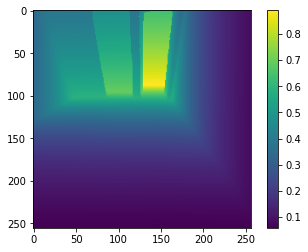

In [51]:
plt.imshow(obs['depth'].reshape(256, 256))
plt.colorbar()

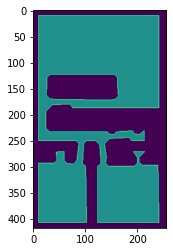

In [52]:
plt.imshow(env._task.sensor_suite.sensors['const_map_object'].top_down_map)

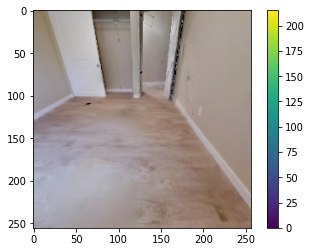

In [53]:
plt.imshow(obs['rgb'])
plt.colorbar()